<p><strong>Модель Линейной Регрессии</strong><br />
Модель линейной регрессии — это математическое уравнение, которое описывает линейную зависимость между независимой переменной (или переменными) и зависимой переменной. В простейшем случае с одной независимой переменной, уравнение модели имеет вид:<br>
𝑦=𝑏0+𝑏1⋅𝑋 <br>
где:<br>
b0 — свободный член (пересечение линии с осью y),<br>
b1 — коэффициент наклона (показывает, как изменяется y при изменении X).<br>
Набор данных о различных социально-экономических показателях для каждого штата США.<br>
Переменные:<br>
metro_res - какой процент населения штата живет в столичной области<br>
white - процент белокожего населения<br>
hs_grad - процент людей со средним образованием<br>
poverty - процент людей, проживающих в бедности<br>
female_house - процент семей, где женщина-домозозяйка<br>
Задача: применить регрессию с одной независимой переменной и исследовать как взаимосвязаны зависимая переменная - poverty (бедность) и предиктор (независимая переменная) - hs_grad (уровень образования).<br>
1) Построить scatter plot, чтобы составить первое впечатление о взимосвязи двух переменных.<br>
2) Построить регрессионную модель, которая объясняет взаимосвязь двух переменных - уравнение регрессионной прямой: y=b0 + b1*x<br>
3) Для построения модели найти: b0 и b1. Рассчитать коэф. детерминации (R^2), чтобы выяснить насколько хорошо модель объясняет поведение зависимой переменной.<br>
H0: b1 = 0 (отсутсвие взаимосвязи в генеральной совокупности).<br>
4) Предсказать чему будет равна зависимая переменная, основываясь на данных о независимой переменной.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Диаграмма рассеивания


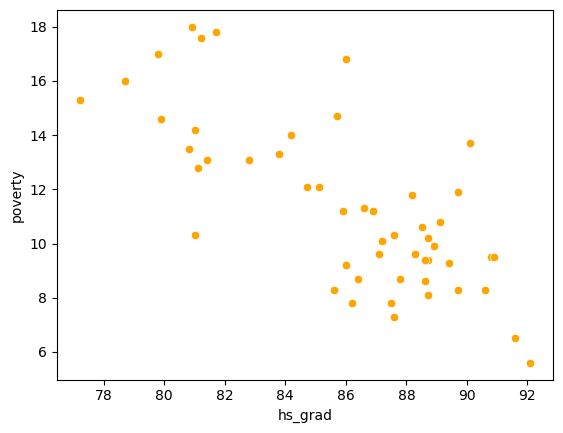

In [10]:
# Строим scatter plot:
sns.scatterplot(data=df, x=df['hs_grad'], y=df['poverty'], color='orange');
print('Диаграмма рассеивания')

Взаимосвязь линейна и отрицательна.

In [22]:
# Считаем коэффициент корреляции Пирсона между двумя переменными при помощи функции np.corrcoef
r_xy = np.corrcoef(x=df['hs_grad'], y=df['poverty'])[0, 1]
print(f"Коэффициент корреляции равен {r_xy}")

Коэффициент корреляции равен -0.7468582531582506


In [13]:
R_sq = r_xy ** 2
print(f'Коэффициент детерминации равен {R_sq}')

Коэффициент детерминации равен 0.5577972503105936


Практически 56% изменчивости нашей зависимой переменной объясняется нашей моделью. Что не очень много, тк практически половина изменчивости обсулавливаетс яне включенными в модель факторами.

In [23]:
# Преобразуем столбцы DataFrame в массивы NumPy. 
# .reshape(-1, 1) изменяет форму массивов на двумерные массивы - матрицы с одной колонкой и неограниченным количеством строк.
y = df['poverty'].to_numpy().reshape(-1, 1)
X = df['hs_grad'].to_numpy().reshape(-1, 1)

# Создаём объект модели линейной регрессии из библиотеки scikit-learn:
LR = LinearRegression()

# Обучаем модель на данных 'x', 'y':
model = LR.fit(X, y)

'model' будет содержать обученную модель линейной регрессии. Эту модель можно использовать для предсказания значений или для получения коэффициентов регрессии.

In [27]:
# Найдем b0 используя атрибут объекта модели линейной регрессии .intercept_
b0 = model.intercept_[0]
b0 = round(b0, 4)
b0

64.781

In [28]:
# Найдем b1 используя атрибут объекта модели линейной регрессии model.intercept_
b1 = model.coef_[0][0]
b1 = round(b1, 4)
b1

-0.6212

Взиамосвязь отрицательная. С увеличением на 1% количества людей имеющих среднее образование, уровень бедности населения будет уменьшаться примерно на 0.62%.

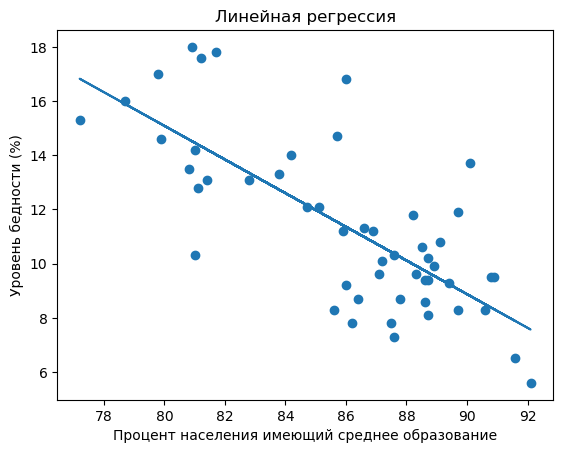

In [17]:
# Построим график с помощью библиотеки matplotlib:

Y = [b0 + b1 * i for i in X] # создаем линию регрессии
plt.xlabel('Процент населения имеющий среднее образование') # метка для оси x
plt.ylabel('Уровень бедности (%)') # метка для оси y
plt.title('Линейная регрессия') # заголовок
plt.scatter(X, y); # строим scatter plot из исходных данных
plt.plot(X, Y); # добавляем линию регрессии

In [30]:
# Используем конструкцию тернарного оператора для создания строки уравнения линейной регрессии.
# Оператор имеет следующую структуру: a if условие else b. В зависимости от значения b1, выбирается одна из двух строк.

LR_equation = f'y = {b0} + {b1}X' if b1 > 0 else f'y = {b0} + ({b1})X'
print(f'Уравнение линейной регрессии: {LR_equation}')

Уравнение линейной регрессии: y = 64.781 + (-0.6212)X
